### Import Libraries and Review Dataset

#### Import Libraries and Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Normalize data
#from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Splitting data
from sklearn.model_selection import train_test_split

# Cross Validation
#from sklearn.model_selection import cross_val_score 
#from sklearn.model_selection import KFold

# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

# Model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Metrics
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_curve

In [2]:
creditcard_dataset = pd.read_csv('/Users/jonathanrabbi/Desktop/Becode/Project_CreditCard/BankChurners.csv')
creditcard_dataset.shape

(10127, 23)

#### Review Dataset

In [3]:
last_two_columns = creditcard_dataset.iloc[:, -2:]
last_two_columns

,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,0.000093,0.999910
1,0.000057,0.999940
2,0.000021,0.999980
3,0.000134,0.999870
4,0.000022,0.999980
...,...,...
10122,0.000191,0.999810
10123,0.995270,0.004729
10124,0.997880,0.002118
10125,0.996710,0.003294


In [4]:
# Remove the last 2 columns as instructed in Kaggle
# I will also remove the unique identifier for each client, as this is not relevant

creditcard_dataset = creditcard_dataset.drop(['CLIENTNUM',
                                              'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
                                              'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
                                              axis=1)

creditcard_dataset.shape

(10127, 20)

In [5]:
creditcard_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [6]:
# Verify and remove any null values
creditcard_dataset.isnull().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [7]:
# verify and remove any duplicate rows
duplicate=creditcard_dataset.duplicated()
duplicate.sum()

0

In [8]:
creditcard_dataset.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


### Data Exploration Part I - Categorical Features

#### Univariate Analysis Categorical Data

##### Education_level

In [9]:
creditcard_dataset['Education_Level'].unique()

array(['High School', 'Graduate', 'Uneducated', 'Unknown', 'College',
       'Post-Graduate', 'Doctorate'], dtype=object)

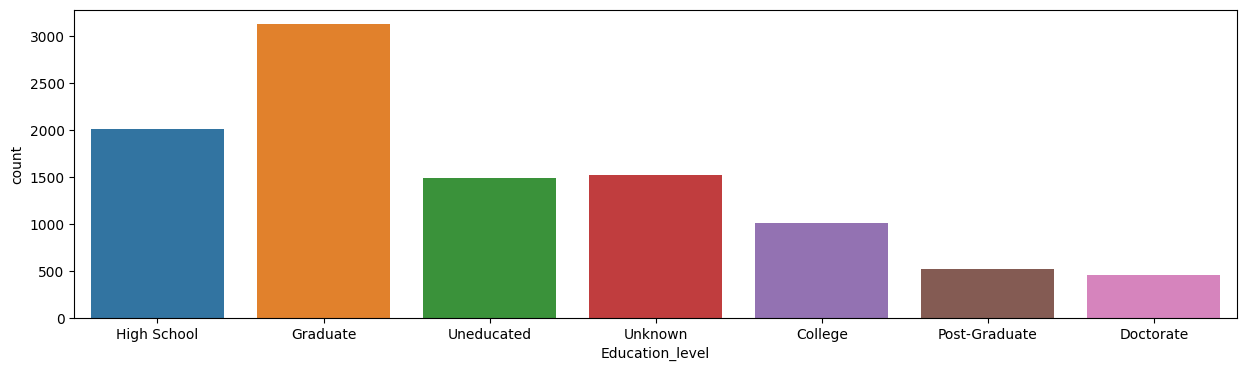

In [10]:
plt.figure(figsize=(15,4))
sns.countplot(x='Education_Level',data=creditcard_dataset)
plt.xlabel('Education_level')
plt.show()


##### Marital_Status

In [11]:
creditcard_dataset['Marital_Status'].unique()

array(['Married', 'Single', 'Unknown', 'Divorced'], dtype=object)

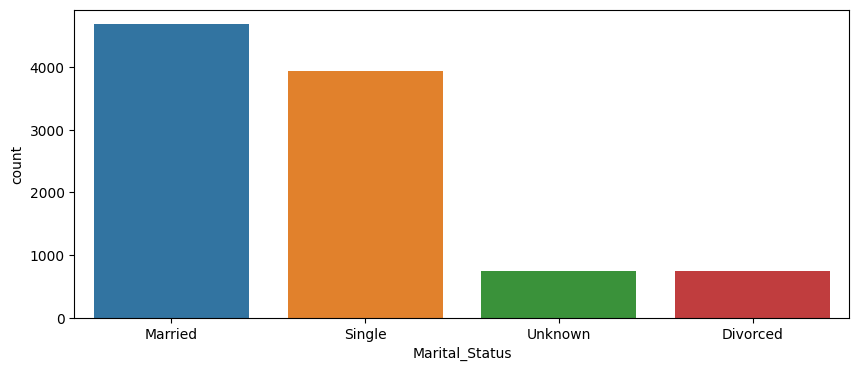

In [12]:
plt.figure(figsize=(10,4))
sns.countplot(x='Marital_Status',data=creditcard_dataset)
plt.xlabel('Marital_Status')
plt.show()

##### Income_category

In [13]:
creditcard_dataset['Income_Category'].unique()

array(['$60K - $80K', 'Less than $40K', '$80K - $120K', '$40K - $60K',
       '$120K +', 'Unknown'], dtype=object)

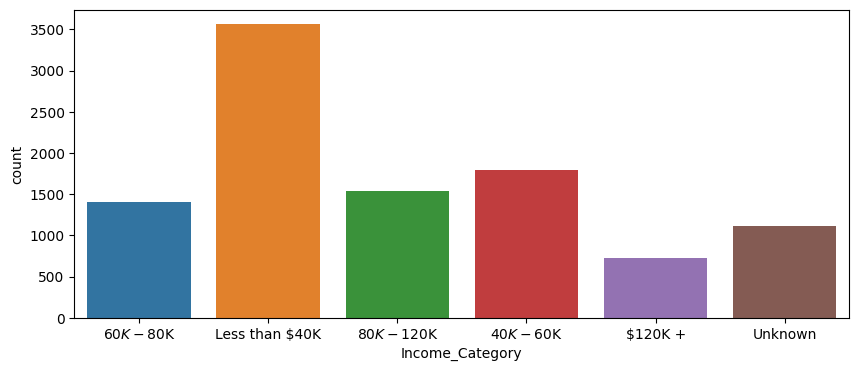

In [14]:
plt.figure(figsize=(10,4))
sns.countplot(x='Income_Category',data=creditcard_dataset)
plt.xlabel('Income_Category')
plt.show()

#### Numericize Categorical Data

In [15]:
""" I want to differentiate between the categorical data and the numercial datasets.
    This provides a clearer overview of potential categorcial features to numericize for the model """

creditcard_dataset_cat = creditcard_dataset.select_dtypes(include=['object'])

print(creditcard_dataset_cat.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Attrition_Flag   10127 non-null  object
 1   Gender           10127 non-null  object
 2   Education_Level  10127 non-null  object
 3   Marital_Status   10127 non-null  object
 4   Income_Category  10127 non-null  object
 5   Card_Category    10127 non-null  object
dtypes: object(6)
memory usage: 474.8+ KB
None


In [16]:
print(creditcard_dataset_cat['Marital_Status'].unique())
print(creditcard_dataset_cat['Education_Level'].unique())
print(creditcard_dataset_cat['Income_Category'].unique())
print(creditcard_dataset_cat['Card_Category'].unique())


['Married' 'Single' 'Unknown' 'Divorced']
['High School' 'Graduate' 'Uneducated' 'Unknown' 'College' 'Post-Graduate'
 'Doctorate']
['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +'
 'Unknown']
['Blue' 'Gold' 'Silver' 'Platinum']


In [17]:
creditcard_dataset_cat = pd.get_dummies(creditcard_dataset_cat, columns=['Attrition_Flag','Gender','Marital_Status'])
creditcard_dataset_cat = creditcard_dataset_cat.drop(['Attrition_Flag_Existing Customer','Gender_F','Marital_Status_Divorced'],axis=1)
creditcard_dataset_cat.head()

,Education_Level,Income_Category,Card_Category,Attrition_Flag_Attrited Customer,Gender_M,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown
0,High School,$60K - $80K,Blue,False,True,True,False,False
1,Graduate,Less than $40K,Blue,False,False,False,True,False
2,Graduate,$80K - $120K,Blue,False,True,True,False,False
3,High School,Less than $40K,Blue,False,False,False,False,True
4,Uneducated,$60K - $80K,Blue,False,True,True,False,False


In [18]:
""" Nominal categories: the order of the category does not have an important sequence
    Ordinal categories: the order of the category is of importance
     
Nominal = [attrition,gender,marital status]
Ordinal = [Educ_level,Income_cat,Card_cat] """

educ_level = {'Unknown': 0,'Uneducated':1,'High School':2,'College':3,'Graduate':4,'Post-Graduate':5,'Doctorate':6}
income_cat = {'Unknown':0,'Less than $40K':1,'$40K - $60K':2,'$60K - $80K':3,'$80K - $120K':4,'$120K +':5}
card_cat = {'Blue':0,'Silver':1,'Gold':2,'Platinum':3}

creditcard_dataset_cat['Education_Level'] = creditcard_dataset_cat['Education_Level'].map(educ_level)
creditcard_dataset_cat['Income_Category'] = creditcard_dataset_cat['Income_Category'].map(income_cat)
creditcard_dataset_cat['Card_Category'] = creditcard_dataset_cat['Card_Category'].map(card_cat)

creditcard_dataset_cat.head()

,Education_Level,Income_Category,Card_Category,Attrition_Flag_Attrited Customer,Gender_M,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown
0,2,3,0,False,True,True,False,False
1,4,1,0,False,False,False,True,False
2,4,4,0,False,True,True,False,False
3,2,1,0,False,False,False,False,True
4,1,3,0,False,True,True,False,False


In [19]:
""" Now I have to concatenate the cat dataset with the original"""

creditcard_dataframe = pd.concat([creditcard_dataset,creditcard_dataset_cat],axis=1)

creditcard_dataframe.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,...,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Education_Level,Income_Category,Card_Category,Attrition_Flag_Attrited Customer,Gender_M,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,...,1.625,0.061,2,3,0,False,True,True,False,False
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,...,3.714,0.105,4,1,0,False,False,False,True,False
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,...,2.333,0.000,4,4,0,False,True,True,False,False
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,...,2.333,0.760,2,1,0,False,False,False,False,True
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,...,2.500,0.000,1,3,0,False,True,True,False,False


In [20]:
""" Drop the categorical columns that have been numericized"""

creditcard_dataframe = creditcard_dataframe.drop(['Attrition_Flag','Gender','Education_Level','Marital_Status','Income_Category','Card_Category'],axis=1)

In [21]:
creditcard_dataframe.head()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Attrition_Flag_Attrited Customer,Gender_M,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown
0,45,3,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,False,True,True,False,False
1,49,5,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,False,False,False,True,False
2,51,3,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,False,True,True,False,False
3,40,4,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,False,False,False,False,True
4,40,3,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,False,True,True,False,False


### Data Exploration Part II - Numerical Features

#### Proportion Attrited Customers

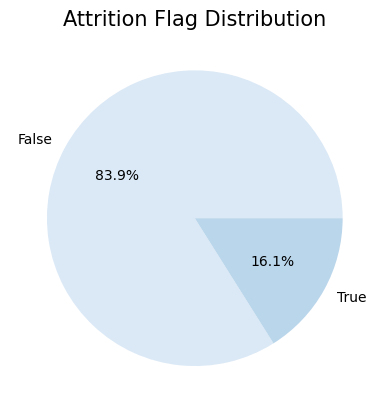

In [22]:
Attrition = creditcard_dataframe['Attrition_Flag_Attrited Customer'].value_counts()
colors = sns.color_palette('Blues')
plt.pie(Attrition, labels=Attrition.index, autopct='%1.1f%%', colors=colors)
plt.title('Attrition Flag Distribution', fontsize=15)
plt.show()


#### Outliers Exploration

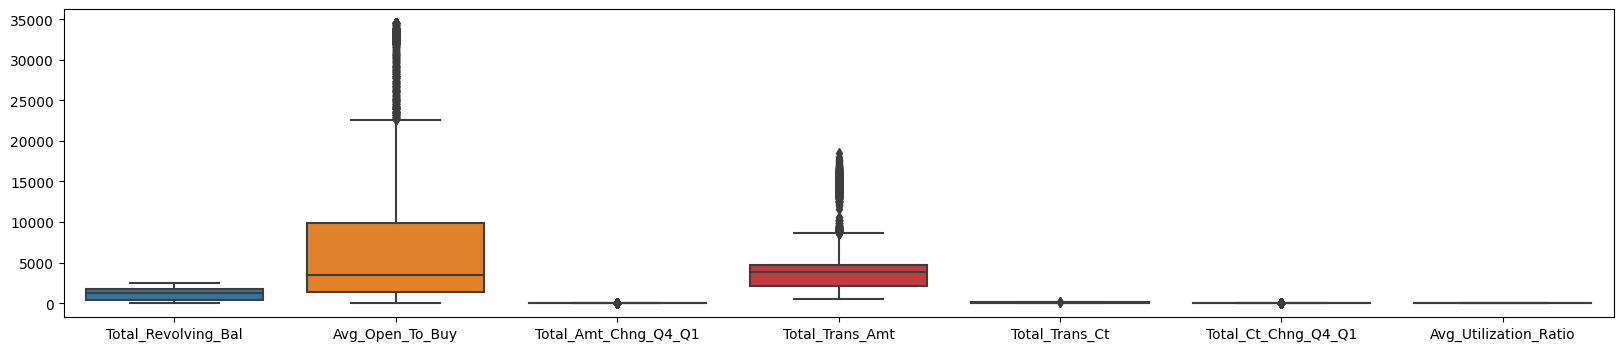

In [23]:
plt.figure(figsize=(20,4))
sns.boxplot(creditcard_dataframe[['Total_Revolving_Bal',
                                 'Avg_Open_To_Buy',
                                 'Total_Amt_Chng_Q4_Q1',
                                 'Total_Trans_Amt',
                                 'Total_Trans_Ct',
                                 'Total_Ct_Chng_Q4_Q1',
                                 'Avg_Utilization_Ratio']])

plt.show()

#### Correlation Matrix

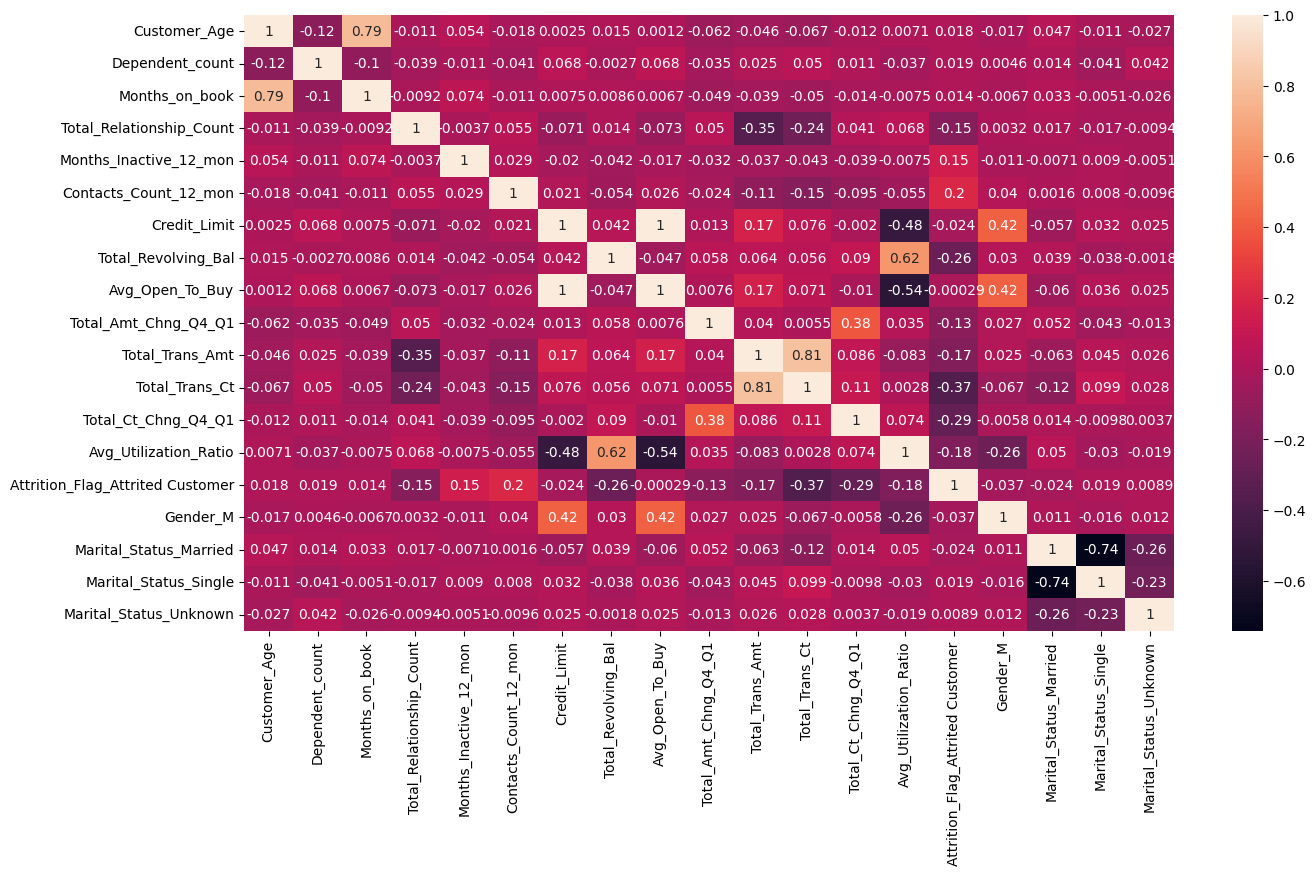

In [24]:
plt.figure(figsize=(15,8))
sns.heatmap(creditcard_dataframe.corr(),cmap='rocket',annot=True)
plt.show()


#### Scatterplots

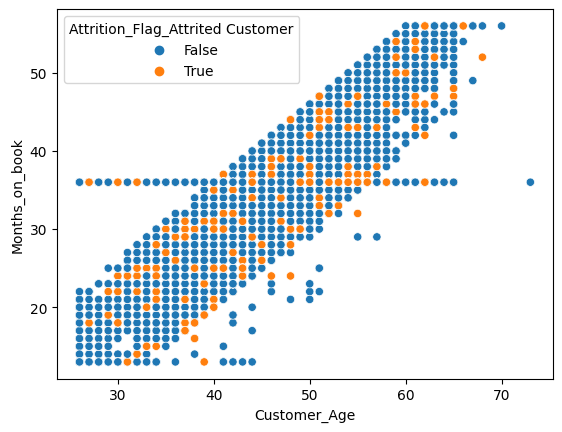

In [25]:
sns.scatterplot(x='Customer_Age',
                y='Months_on_book',
                data=creditcard_dataframe,
                hue='Attrition_Flag_Attrited Customer')
plt.show()

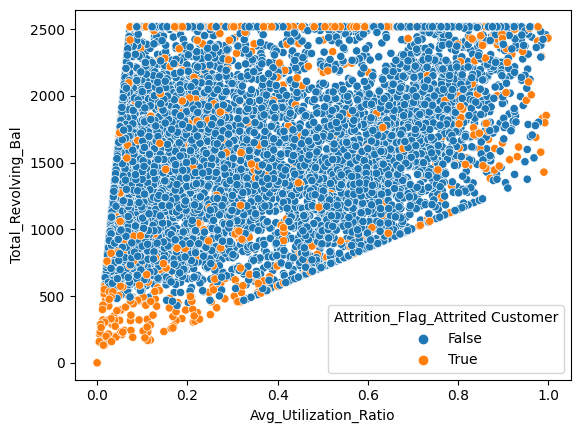

In [26]:
sns.scatterplot(x='Avg_Utilization_Ratio',
                y='Total_Revolving_Bal',
                data=creditcard_dataframe,
                hue='Attrition_Flag_Attrited Customer')
plt.show()

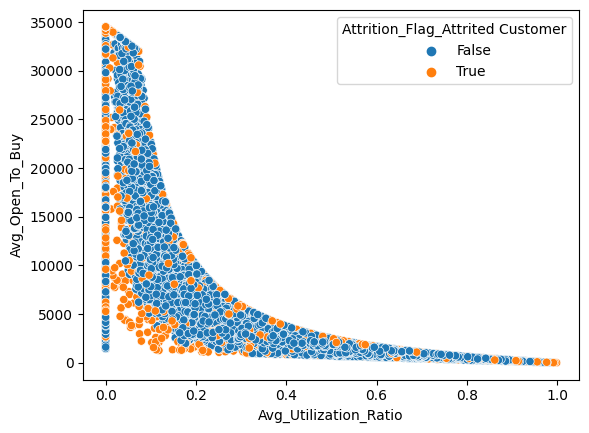

In [27]:
sns.scatterplot(x='Avg_Utilization_Ratio',
                y='Avg_Open_To_Buy',
                data=creditcard_dataframe,
                hue='Attrition_Flag_Attrited Customer')
plt.show()

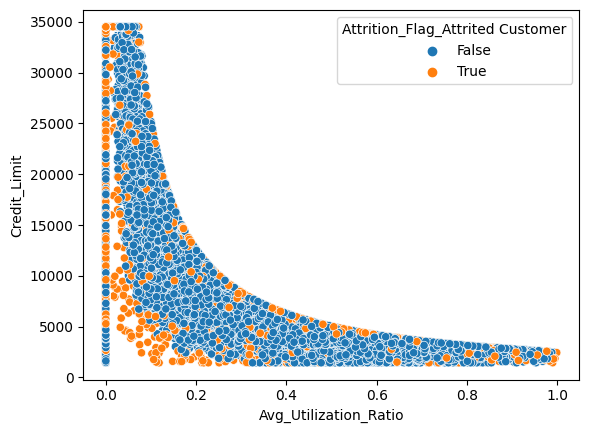

In [28]:
sns.scatterplot(x='Avg_Utilization_Ratio',
                y='Credit_Limit',
                data=creditcard_dataframe,
                hue='Attrition_Flag_Attrited Customer')
plt.show()

### Prepare Data Before Modelling

#### Splitting The Dataset

In [29]:
X = creditcard_dataframe.drop(['Avg_Open_To_Buy','Total_Trans_Ct','Attrition_Flag_Attrited Customer'],axis=1) # dropped features regarding high feature correaltion
y = creditcard_dataframe['Attrition_Flag_Attrited Customer']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=10) 


print("X_train shape:", X_train.shape)
print("y_train shape:",y_train.shape)
print ("X_test shape:",X_test.shape)
print("y_test shape:",y_test.shape)

X_train shape: (7595, 16)
y_train shape: (7595,)
X_test shape: (2532, 16)
y_test shape: (2532,)


#### Normalizing The Features

In [30]:
""" I will be normalizing the training set, so that all fatures are treated equally and that larger weights aren't assigned
 to features with larger values. """

scaler = MinMaxScaler() # I do not assume that my data follows a normal distribution, hence not StandardScaler

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

#### Cross Validation and HyperParameter Tuning - Hybrid

##### Process for Best Classification Model 

In [36]:
model_param = {
    'knn': {
        'model': KNeighborsClassifier(),
        'param' : {'n_neighbors':[3,5,10,100],
                   'weights':['uniform','distance']
                   }
        },
    'Logistic':{
        'model':LogisticRegression(),
        'param': { 'C':[1,5,10]}
        },
    'RandomForest': {
        'model': RandomForestClassifier(),
        'param' : {'n_estimators':[5,10,50,100]}
        },
    'DecisionTree':{
        'model': DecisionTreeClassifier(),
        'param' : {'criterion': ['gini', 'entropy'],
            'max_depth': [None, 10, 20, 30],  
            'min_samples_split': [2, 5, 10],  
            'min_samples_leaf': [1, 2, 4]    
        }
        }
            }   


In [37]:
scores = []

for model_name, mp in model_param.items():
    hyperpara_model = GridSearchCV(mp['model'], mp['param'],cv=5,return_train_score=False)
    hyperpara_model.fit(X,y)
    scores.append({
        'model': model_name,
        'best_score':hyperpara_model.best_score_,
        'best_param':hyperpara_model.best_params_
    })

/Users/jonathanrabbi/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/jonathanrabbi/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/jonathanrabbi/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
  File "/Users/jonathanrabbi/Library/Python/3.9/lib/python/site-packages/sklearn/base.py", line 705, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/jonathanrabbi/Library/Python/3.9/lib/python/site-packages/sklearn/neighbors/_classification.py", line 246, in predict
    if self._fit_method == "brute" and ArgKminClassMode.is_usable_for(

In [38]:
scores = pd.DataFrame(scores)
scores

,model,best_score,best_param
0,knn,0.866109,"{'n_neighbors': 100, 'weights': 'distance'}"
1,Logistic,0.872319,{'C': 1}
2,RandomForest,0.913993,{'n_estimators': 100}
3,DecisionTree,0.899480,"{'criterion': 'entropy', 'max_depth': 20, 'min..."


### Classification Modelling

#### RandomForest

In [39]:
# use the classifier and parameter based on the hyperparameter tuning
Random_forest_model = RandomForestClassifier(n_estimators=100)

In [40]:
# fit the model on the trained data
Random_forest_model = Random_forest_model.fit(X_train,y_train)

In [41]:
# verify the R^2 score of the model and see the representation of the mdoel
print("Test set score:",Random_forest_model.score(X_test,y_test))
print("Train set score:",Random_forest_model.score(X_train,y_train))

''' 95.22% of the test data accurately predicts the test label'''

Test set score: 0.9427330173775671
Train set score: 1.0


' 95.22% of the test data accurately predicts the test label'

#### Accuracy Score

In [42]:
# use the model to make the appropriate prediction of the labels
y_pred = Random_forest_model.predict(X_test)
y_pred

array([False, False, False, ..., False, False,  True])

In [43]:
# verify the accuracy score of the model relative to the actual results

accuracy_score(y_pred,y_test)

0.9427330173775671

### Classification Validation

Due to the dataset being imbalanced, the accuracy score doesn't say much about how well the prediction works in terms of taking the attrited customers into account. If 16% of the datapoints relate to atritted customers, then the splitting of the data and the training of the model need to take the relative proportion into account as well.

#### Confusion Matrix

In [44]:
# Construct confusion matrix

confusion_matrix(y_pred,y_test)

array([[2120,  127],
       [  18,  267]])

#### Classification Report

In [45]:
# Construct classification report

class_report = classification_report(y_pred,y_test)
print(class_report)




              precision    recall  f1-score   support

       False       0.99      0.94      0.97      2247
        True       0.68      0.94      0.79       285

    accuracy                           0.94      2532
   macro avg       0.83      0.94      0.88      2532
weighted avg       0.96      0.94      0.95      2532

